Download the Bach chorales dataset and unzip it. It is composed of 382 chorales composed by Johann Sebastian Bach. Each chorale is 100 to 640 time steps long,
and each time step contains 4 integers, where each integer corresponds to a note’s
index on a piano (except for the value 0, which means that no note is played).
Train a model—recurrent, convolutional, or both—that can predict the next time
step (four notes), given a sequence of time steps from a chorale. Then use this
model to generate Bach-like music, one note at a time: you can do this by giving
the model the start of a chorale and asking it to predict the next time step, then
appending these time steps to the input sequence and asking the model for the
next note, and so on. Also make sure to check out Google’s Coconet model,
which was used for a nice Google doodle about Bach.

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filepath = tf.keras.utils.get_file(
    "jsb_chorales.tgz",
    "https://github.com/ageron/data/raw/main/jsb_chorales.tgz",
    cache_dir=".",
    extract=True)

117793/117793 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
if "_extracted" in filepath:
    jsb_chorales_dir = Path(filepath) / "jsb_chorales"
else:
    jsb_chorales_dir = Path(filepath).with_name("jsb_chorales")

train_files = sorted(jsb_chorales_dir.glob("train/chorale_*.csv"))
valid_files = sorted(jsb_chorales_dir.glob("valid/chorale_*.csv"))
test_files = sorted(jsb_chorales_dir.glob("test/chorale_*.csv"))

In [4]:
def load_chorales(filepaths):
    return [pd.read_csv(filepath).values.tolist() for filepath in filepaths]

train_chorales = load_chorales(train_files)
valid_chorales = load_chorales(valid_files)
test_chorales = load_chorales(test_files)

# Data Preprocessing

In [ ]:
df_0=pd.DataFrame(train_chorales[0])

<Axes: >

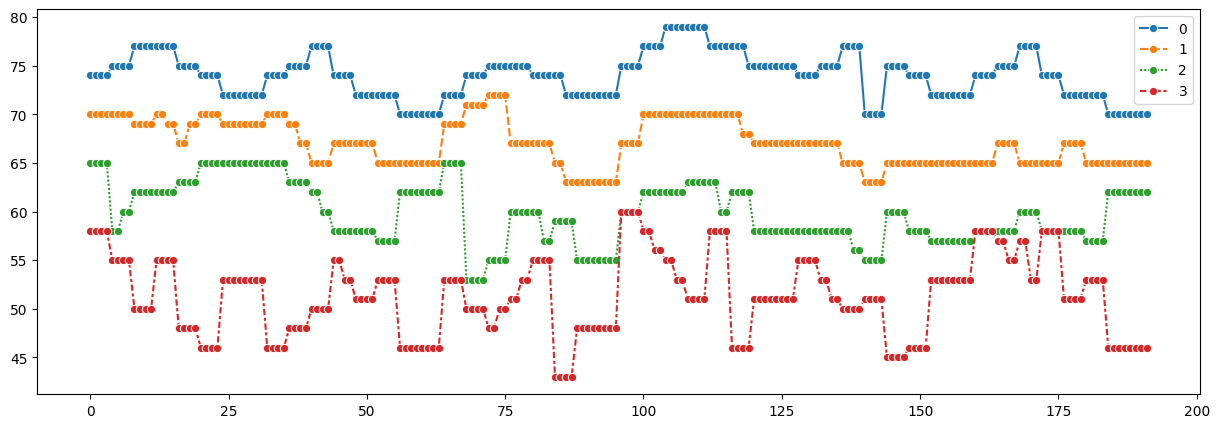

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df_0,marker='o',legend=True)

* I make a function to transform our data to Dataframe

In [ ]:
def make_dataframe(array):
  df=pd.DataFrame()
  for i in range(len(array)):
    df_new=pd.DataFrame(array[i])
    df=pd.concat([df,df_new],axis=0)
  return df

In [ ]:
train_df=make_dataframe(train_chorales)

In [ ]:
train_df.head(5)

,0,1,2,3
0,74,70,65,58
1,74,70,65,58
2,74,70,65,58
3,74,70,65,58
4,75,70,58,55


In [ ]:
valid_df=make_dataframe(valid_chorales)
test_df=make_dataframe(test_chorales)

In [ ]:
len(train_df),len(valid_df),len(test_df)

(55228, 18408, 18900)

<Axes: >

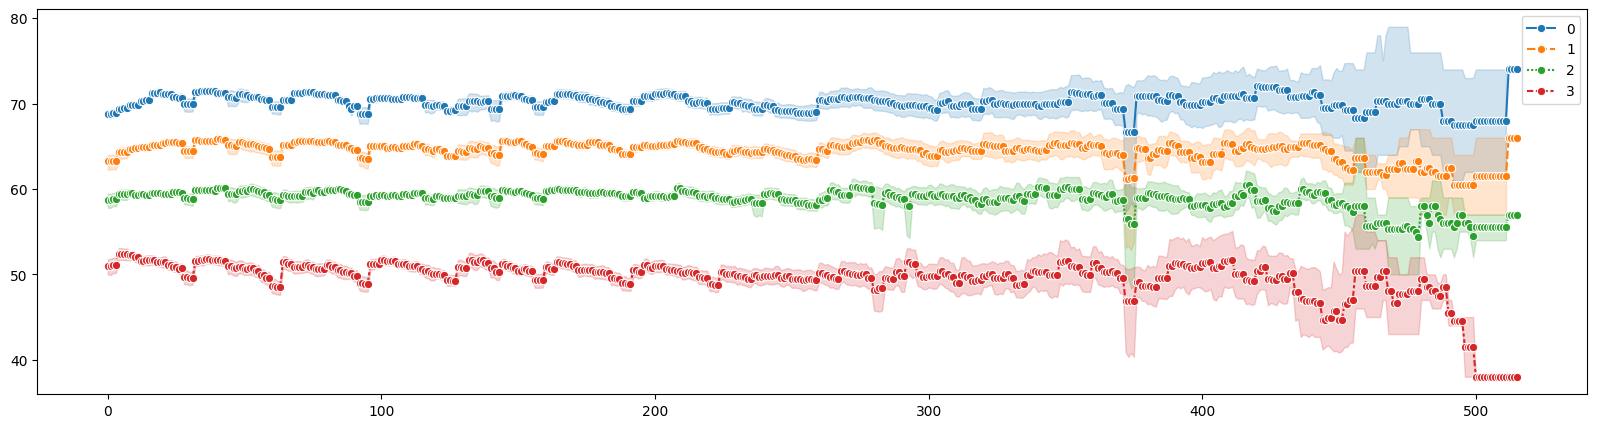

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=train_df,marker='o',legend=True)

<Axes: ylabel='1'>

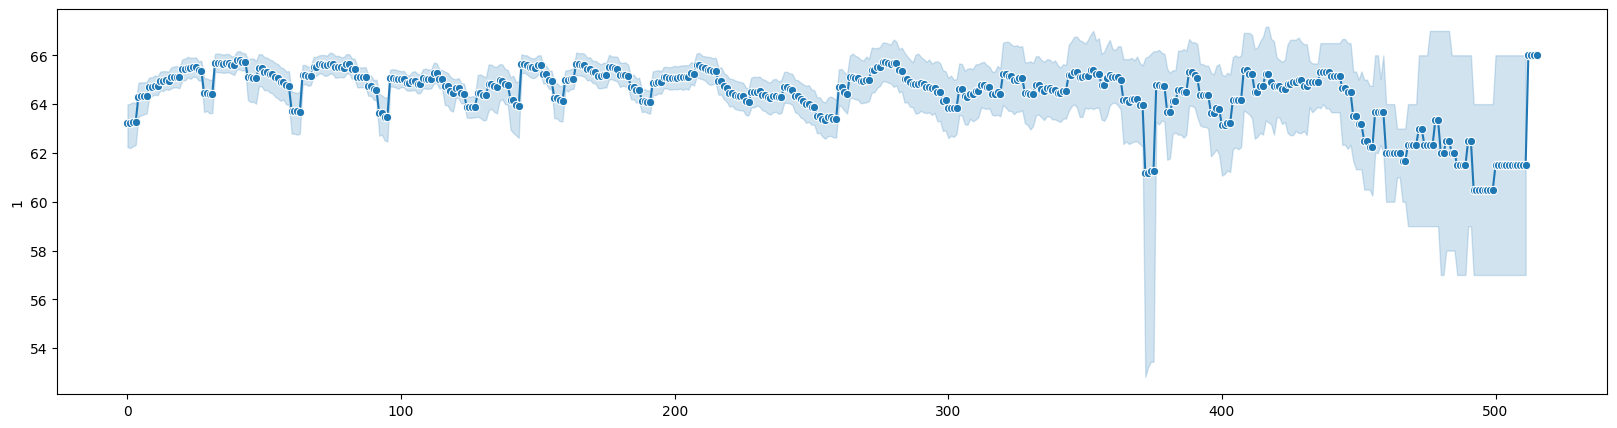

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=train_df[1],marker='o',legend=True)

# Let's Make Our DataSets

In [ ]:
seq_len=10

train_ds=tf.keras.preprocessing.timeseries_dataset_from_array(train_df.to_numpy(),
                                                              sequence_length=seq_len,
                                                              targets=train_df.to_numpy()[seq_len:],
                                                              batch_size=32,
                                                              shuffle=True)




In [ ]:
valid_ds=tf.keras.preprocessing.timeseries_dataset_from_array(valid_df.to_numpy(),
                                                              sequence_length=seq_len,
                                                              targets=valid_df.to_numpy()[seq_len:],
                                                              batch_size=32,
                                                              )
test_ds=tf.keras.preprocessing.timeseries_dataset_from_array(test_df.to_numpy(),
                                                              sequence_length=seq_len,
                                                              targets=test_df.to_numpy()[seq_len:])

# Model_1

In [ ]:
model_1=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(seq_len,4)),
    tf.keras.layers.GRU(128,return_sequences=True),
    tf.keras.layers.GRU(128,return_sequences=False),
    tf.keras.layers.Dense(4)
])

In [ ]:
model_1.compile(loss='mse',
              optimizer=tf.keras.optimizers.Nadam(),
              metrics=['mae'])

In [ ]:
model_1.fit(train_ds,epochs=50,validation_data=valid_ds)

Epoch 1/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 37s 18ms/step - loss: 923.6718 - mse: 923.6718 - val_loss: 42.9668 - val_mse: 42.9668
Epoch 2/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - loss: 17.9285 - mse: 17.9285 - val_loss: 26.6227 - val_mse: 26.6227
Epoch 3/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - loss: 16.8980 - mse: 16.8980 - val_loss: 24.5611 - val_mse: 24.5611
Epoch 4/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - loss: 16.6496 - mse: 16.6496 - val_loss: 24.2926 - val_mse: 24.2926
Epoch 5/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 32s 18ms/step - loss: 16.4535 - mse: 16.4535 - val_loss: 24.8029 - val_mse: 24.8029
Epoch 6/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - loss: 16.2676 - mse: 16.2676 - val_loss: 24.7028 - val_mse: 24.7028
Epoch 7/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 38s 22ms/step - loss: 16.4523 - mse: 16.4523 - val_loss: 23.6669 - val_mse: 23.6669
Epoch 8/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - loss: 16.5254 - mse: 16.5254 - val_loss: 24.4924 - val_mse

* With Learning Rate Function

In [ ]:
def lr_schedule_exp(epoch):
  if epoch<40:
    return float(tf.exp(-epoch/10.)*0.01)/2
  else:
    return 0.0001/5
learning_rate_callback=tf.keras.callbacks.LearningRateScheduler(lr_schedule_exp)
checkpoint=tf.keras.callbacks.ModelCheckpoint('model_1.keras',monitor='val_loss',mode='min',save_best_only=True,verbose=1)

In [ ]:
history=model_1.fit(train_ds,epochs=50,validation_data=valid_ds,callbacks=[learning_rate_callback,checkpoint])

Epoch 1/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 333.1418 - mae: 10.2477
Epoch 1: val_loss improved from inf to 39.46776, saving model to model_1.keras
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - loss: 333.0044 - mae: 10.2446 - val_loss: 39.4678 - val_mae: 3.3721 - learning_rate: 0.0050
Epoch 2/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 19.0863 - mae: 3.1202
Epoch 2: val_loss improved from 39.46776 to 26.72708, saving model to model_1.keras
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - loss: 19.0859 - mae: 3.1201 - val_loss: 26.7271 - val_mae: 3.2053 - learning_rate: 0.0045
Epoch 3/50
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 18.1025 - mae: 3.1123
Epoch 3: val_loss did not improve from 26.72708
1726/1726 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - loss: 18.1024 - mae: 3.1123 - val_loss: 31.7259 - val_mae: 3.2767 - learning_rate: 0.0041
Epoch 4/50
1724/1726 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 18.0126 - mae: 3.1124
Epoch 4: val_loss improved from 26

<Axes: >

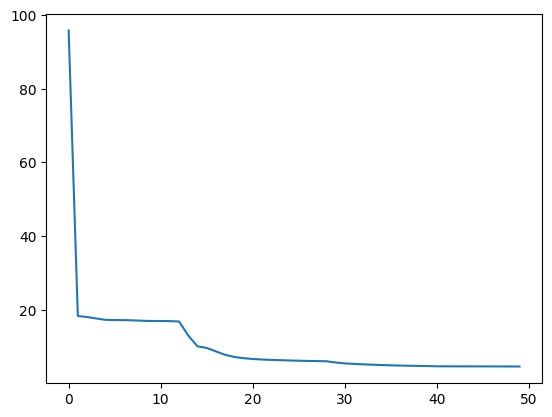

In [ ]:
sns.lineplot(history.history['loss'])

# I Will Make Our Data Into A Time Sires With One Note At A Time

In [5]:
note_list=[]
for chorales in (train_chorales, valid_chorales, test_chorales):
    for chorale in chorales:
        for chord in chorale:
            for note in chord:
                if note not in note_list:
                    note_list.append(note)
                else:
                  pass

In [6]:
un_notes=len(note_list)
print(f'We Have {len(note_list)} Unique Notes')

We Have 47 Unique Notes


In [7]:
train_list=[]
for item in (train_chorales):
  train_list= np.concat((train_list,np.reshape(item,(-1))),axis=0)

In [8]:
valid_list=[]
for item in (train_chorales):
  valid_list= np.concat((valid_list,np.reshape(item,(-1))),axis=0)

<Axes: >

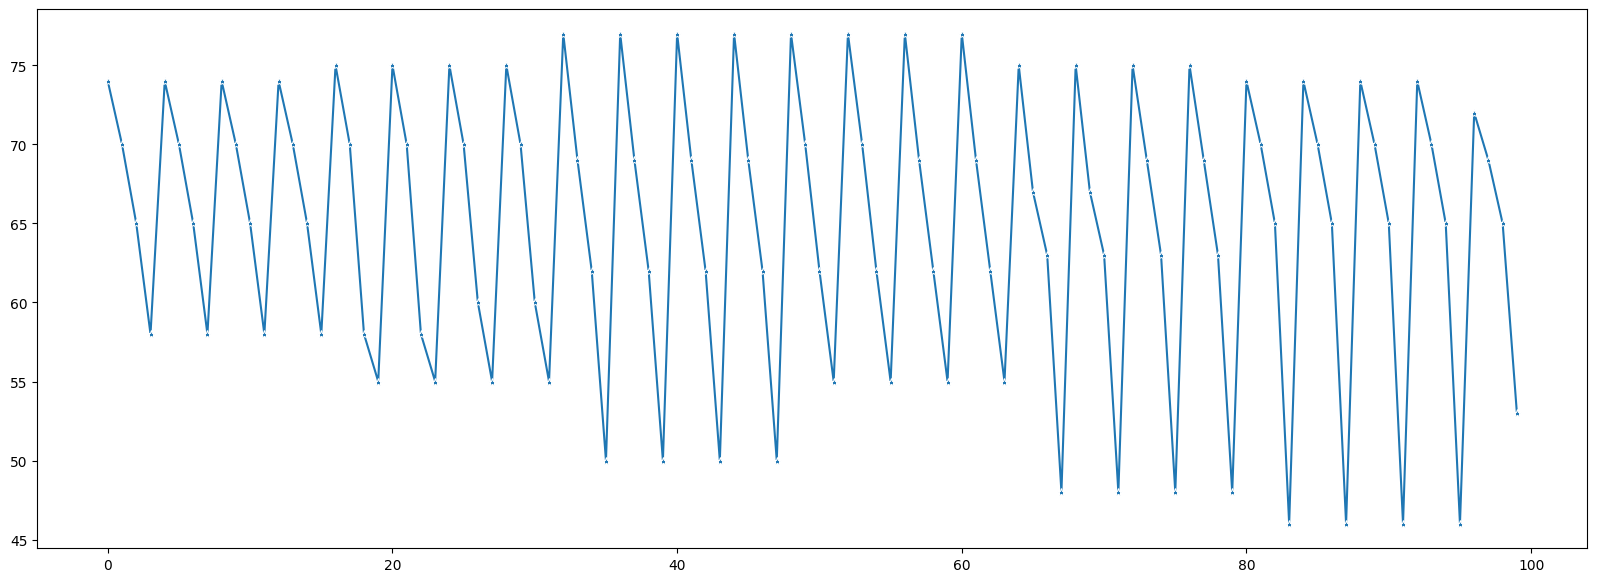

In [9]:
plt.figure(figsize=(20,7))
sns.lineplot(train_list[0:100],marker='*')

In [ ]:
train_ds=tf.keras.preprocessing.timeseries_dataset_from_array(list_new,
                                                              sequence_length=128,
                                                              targets=list_new[128:], batch_size=32)


valid_ds=tf.keras.preprocessing.timeseries_dataset_from_array(list_new,
                                                              sequence_length=128,
                                                              targets=list_new[128:], batch_size=32)

In [ ]:
train_ds.element_spec

(TensorSpec(shape=(None, None), dtype=tf.float64, name=None),
 TensorSpec(shape=(None,), dtype=tf.float64, name=None))

In [ ]:
list(train_ds.take(1))

[(<tf.Tensor: shape=(32, 128), dtype=float64, numpy=
  array([[74., 70., 65., ..., 69., 65., 53.],
         [70., 65., 58., ..., 65., 53., 74.],
         [65., 58., 74., ..., 53., 74., 70.],
         ...,
         [70., 60., 55., ..., 63., 48., 75.],
         [60., 55., 77., ..., 48., 75., 67.],
         [55., 77., 69., ..., 75., 67., 63.]])>,
  <tf.Tensor: shape=(32,), dtype=float64, numpy=
  array([74., 70., 65., 46., 74., 70., 65., 46., 74., 70., 65., 46., 74.,
         70., 65., 46., 75., 69., 63., 48., 75., 69., 63., 48., 75., 67.,
         63., 48., 75., 67., 63., 48.])>)]

In [ ]:
model_2=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(None,1)),
    tf.keras.layers.GRU(128, return_sequences=False),
    tf.keras.layers.Dense(1)
])
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 128)            │        50,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,433 (197.00 KB)

 Trainable params: 50,433 (197.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def lr_schedule_exp(epoch):
  if epoch<40:
    return float(tf.exp(-epoch/10.)*0.01)
  else:
    return 0.0001/5
learning_rate_callback=tf.keras.callbacks.LearningRateScheduler(lr_schedule_exp)
checkpoint=tf.keras.callbacks.ModelCheckpoint('model_1.keras',monitor='val_loss',mode='min',save_best_only=True,verbose=1)

In [ ]:
model_2.compile(loss='mse',
              optimizer=tf.keras.optimizers.Nadam(),
              metrics=['mse'])

In [ ]:
history=model_2.fit(train_ds,epochs=50,validation_data=valid_ds,callbacks=[learning_rate_callback,checkpoint])

Epoch 1/50
6899/6900 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 112.8983 - mse: 112.8983
Epoch 1: val_loss improved from inf to 1.90665, saving model to model_1.keras
6900/6900 ━━━━━━━━━━━━━━━━━━━━ 120s 17ms/step - loss: 112.8780 - mse: 112.8780 - val_loss: 1.9067 - val_mse: 1.9067 - learning_rate: 0.0100
Epoch 2/50
6899/6900 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.5221 - mse: 2.5221
Epoch 2: val_loss improved from 1.90665 to 1.26348, saving model to model_1.keras
6900/6900 ━━━━━━━━━━━━━━━━━━━━ 112s 16ms/step - loss: 2.5220 - mse: 2.5220 - val_loss: 1.2635 - val_mse: 1.2635 - learning_rate: 0.0090
Epoch 3/50
6900/6900 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.8644 - mse: 1.8644
Epoch 3: val_loss improved from 1.26348 to 0.99405, saving model to model_1.keras
6900/6900 ━━━━━━━━━━━━━━━━━━━━ 112s 16ms/step - loss: 1.8643 - mse: 1.8643 - val_loss: 0.9940 - val_mse: 0.9940 - learning_rate: 0.0082
Epoch 4/50
6895/6900 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2451 - mse: 1.2451
Epoch 

KeyboardInterrupt: 

In [ ]:
sns.lineplot(history.history['loss'],label='loss')
sns.lineplot(history.history['val_loss'],label='val_loss')

In [ ]:
from sklearn.metrics import r2_score

# Seq_to_seq Dataset

In [10]:
def make_slide_windows(data,shift=14,seq_length=128):
  data=tf.data.Dataset.from_tensor_slices(data)
  data=data.window(seq_length+1,shift=shift+1,drop_remainder=True)
  data=data.flat_map(lambda window:window.batch(seq_length+1))
  return data.map(lambda window:(window[:-1],window[1:])).batch(32).prefetch(1)


In [11]:
train_ds=make_slide_windows(train_list)

In [12]:
valid_ds=make_slide_windows(valid_list)

In [13]:
train_ds.element_spec

(TensorSpec(shape=(None, None), dtype=tf.float64, name=None),
 TensorSpec(shape=(None, None), dtype=tf.float64, name=None))

In [14]:
list(train_ds.take(1))

[(<tf.Tensor: shape=(32, 128), dtype=float64, numpy=
  array([[74., 70., 65., ..., 69., 65., 53.],
         [58., 75., 70., ..., 74., 70., 65.],
         [60., 55., 77., ..., 48., 75., 67.],
         ...,
         [51., 79., 70., ..., 70., 63., 55.],
         [63., 58., 77., ..., 51., 75., 65.],
         [70., 62., 46., ..., 60., 45., 74.]])>,
  <tf.Tensor: shape=(32, 128), dtype=float64, numpy=
  array([[70., 65., 58., ..., 65., 53., 74.],
         [75., 70., 58., ..., 70., 65., 46.],
         [55., 77., 69., ..., 75., 67., 63.],
         ...,
         [79., 70., 63., ..., 63., 55., 51.],
         [58., 77., 70., ..., 75., 65., 60.],
         [62., 46., 77., ..., 45., 74., 65.]])>)]

#From the Book

In [ ]:
notes = set()
for chorales in (train_chorales, valid_chorales, test_chorales):
    for chorale in chorales:
        for chord in chorale:
            notes |= set(chord)

n_notes = len(notes)
min_note = min(notes - {0})
max_note = max(notes)


In [ ]:
def create_target(batch):
    X = batch[:, :-1]
    Y = batch[:, 1:] # predict next note in each arpegio, at each step
    return X, Y

def preprocess(window):
    window = tf.where(window == 0, window, window - min_note + 1) # shift values
    return tf.reshape(window, [-1]) # convert to arpegio

def bach_dataset(chorales, batch_size=32, shuffle_buffer_size=None,
                 window_size=32, window_shift=16, cache=True):
    def batch_window(window):
        return window.batch(window_size + 1)

    def to_windows(chorale):
        dataset = tf.data.Dataset.from_tensor_slices(chorale)
        dataset = dataset.window(window_size + 1, window_shift, drop_remainder=True)
        return dataset.flat_map(batch_window)

    chorales = tf.ragged.constant(chorales, ragged_rank=1)
    dataset = tf.data.Dataset.from_tensor_slices(chorales)
    dataset = dataset.flat_map(to_windows).map(preprocess)
    if cache:
        dataset = dataset.cache()
    if shuffle_buffer_size:
        dataset = dataset.shuffle(shuffle_buffer_size)
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(create_target)
    return dataset.prefetch(1)

In [ ]:
train_set = bach_dataset(train_chorales, shuffle_buffer_size=1000)
valid_set = bach_dataset(valid_chorales)
test_set = bach_dataset(test_chorales)

In [ ]:
train_set.element_spec

(TensorSpec(shape=(None, None), dtype=tf.int32, name=None),
 TensorSpec(shape=(None, None), dtype=tf.int32, name=None))

In [ ]:
list(train_set.take(1))

[(<tf.Tensor: shape=(32, 131), dtype=int32, numpy=
  array([[32, 27, 23, ..., 32, 30, 27],
         [37, 29, 25, ..., 35, 27, 23],
         [38, 34, 29, ..., 41, 29, 24],
         ...,
         [35, 34, 27, ..., 32, 27, 20],
         [38, 34, 29, ..., 39, 35, 30],
         [34, 31, 19, ..., 34, 26, 22]], dtype=int32)>,
  <tf.Tensor: shape=(32, 131), dtype=int32, numpy=
  array([[27, 23,  8, ..., 30, 27, 23],
         [29, 25, 22, ..., 27, 23, 20],
         [34, 29, 10, ..., 29, 24, 21],
         ...,
         [34, 27, 20, ..., 27, 20, 16],
         [34, 29, 22, ..., 35, 30, 15],
         [31, 19, 15, ..., 26, 22, 19]], dtype=int32)>)]

In [ ]:
list(train_ds.take(1))

[(<tf.Tensor: shape=(32, 128), dtype=float64, numpy=
  array([[74., 70., 65., ..., 69., 65., 53.],
         [58., 75., 70., ..., 74., 70., 65.],
         [60., 55., 77., ..., 48., 75., 67.],
         ...,
         [51., 79., 70., ..., 70., 63., 55.],
         [63., 58., 77., ..., 51., 75., 65.],
         [70., 62., 46., ..., 60., 45., 74.]])>,
  <tf.Tensor: shape=(32, 128), dtype=float64, numpy=
  array([[70., 65., 58., ..., 65., 53., 74.],
         [75., 70., 58., ..., 70., 65., 46.],
         [55., 77., 69., ..., 75., 67., 63.],
         ...,
         [79., 70., 63., ..., 63., 55., 51.],
         [58., 77., 70., ..., 75., 65., 60.],
         [62., 46., 77., ..., 45., 74., 65.]])>)]

# Model_2

In [29]:
model=tf.keras.Sequential([])
model.add(tf.keras.layers.Input(shape=[None]))
model.add(tf.keras.layers.Embedding(input_dim=82,output_dim=5)),
model.add(tf.keras.layers.Conv1D(32, kernel_size=2, padding="causal", activation="relu"))
for rate in (2,4,8):
  model.add(tf.keras.layers.Conv1D(filters=rate*15,padding='causal',kernel_size=2,activation='relu',dilation_rate=rate))
  model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.GRU(256,return_sequences=True)),
model.add(tf.keras.layers.Dense(82,activation='softmax'))
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, None, 5)        │           410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_20 (Conv1D)              │ (None, None, 32)       │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_21 (Conv1D)              │ (None, None, 30)       │         1,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, None, 30)       │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_22 (Conv1D)              │ (None, None, 60)       │         3,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, None, 60)       │           240 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_23 (Conv1D)              │ (None, None, 120)      │        14,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_18          │ (None, None, 120)      │           480 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, None, 256)      │       290,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, None, 82)       │        21,074 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,110 (1.27 MB)

 Trainable params: 332,690 (1.27 MB)

 Non-trainable params: 420 (1.64 KB)

In [30]:
def lr_schedule_exp(epoch):
  if epoch<40:
    return float(tf.exp(-epoch/10.)*0.01)
  else:
    return 0.0001/5
learning_rate_callback=tf.keras.callbacks.LearningRateScheduler(lr_schedule_exp)
checkpoint=tf.keras.callbacks.ModelCheckpoint('model.keras',monitor='val_accuracy',mode='max',save_best_only=True,verbose=1)

In [31]:

model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Nadam(),
              metrics=["accuracy"])
history=model.fit(train_ds, epochs=50, validation_data=valid_ds,callbacks=[learning_rate_callback,checkpoint])

Epoch 1/50
    459/Unknown 44s 17ms/step - accuracy: 0.4066 - loss: 2.5343
Epoch 1: val_accuracy improved from -inf to 0.62352, saving model to model.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.4074 - loss: 2.5310 - val_accuracy: 0.6235 - val_loss: 1.4677 - learning_rate: 0.0100
Epoch 2/50
458/460 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7308 - loss: 1.1251
Epoch 2: val_accuracy improved from 0.62352 to 0.76045, saving model to model.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.7309 - loss: 1.1247 - val_accuracy: 0.7605 - val_loss: 0.9598 - learning_rate: 0.0090
Epoch 3/50
457/460 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7615 - loss: 0.9628
Epoch 3: val_accuracy improved from 0.76045 to 0.77500, saving model to model.keras
460/460 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.7615 - loss: 0.9625 - val_accuracy: 0.7750 - val_loss: 0.8723 - learning_rate: 0.0082
Epoch 4/50
459/460 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7742 -

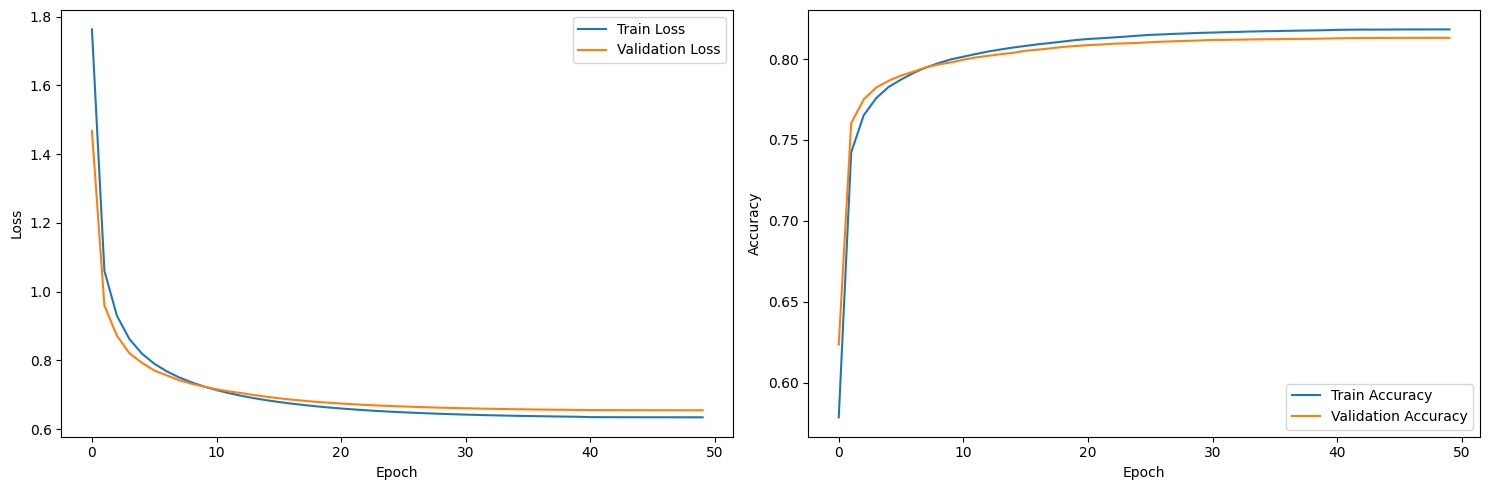

In [32]:
fig,axes=plt.subplots(1,2,figsize=(15,5))

axes[0].plot(history.history['loss'],label='Train Loss')
axes[0].plot(history.history['val_loss'],label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()

axes[1].plot(history.history['accuracy'],label='Train Accuracy')
axes[1].plot(history.history['val_accuracy'],label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()

In [ ]:
model.save('Bach_model_2.keras')